# High Value Customer Identification

## Solution Planning - IOT

### Inputs

1. Business problem
    - Select the most valuable clients to integrate with a loyalty program.

2. Data set
    - Sales of an online e-commerce during the period of a year.

### Output

1. The indication of people who will be part of the insiders program.
    - List: client_id | is_insider |

    Example:
        10451 | yes
        10452 | no

2. Report with Business Questions
    - Who are the eligible people to join the Insiders program?
    - How many clients will be part of the group?
    - What are the main characteristics of these clients?
    - What is the revenue contribution percentage coming from Insiders?
    - What is the revenue forecast for this group in the upcoming months?
    - What are the conditions for someone to be eligible for the Insiders program?
    - What are the conditions for someone to be removed from the Insiders program?
    - What guarantees that the Insiders program performs better than the rest of the client base?
    - What actions can the marketing team take to increase revenue?m

### Tasks

#### 1. Who are the eligible people to join the Insiders program?

* **What defines an eligible customer? Who are the clients with the highest value?**

    * **Financial Metrics (Invoicing):**
        * High Average Ticket (e.g., 1, 10, 50, 34 - *These seem to be placeholder values or examples, actual thresholds to be determined*)
        * High Lifetime Value (LTV)
        * Low Recency (i.e., purchased recently)
        * High Basket Size (number of items per purchase)
        * Low Churn Probability
        * High Purchase Propensity (likelihood to buy)

    * **Cost Metrics:**
        * Low Return Rate

    * **Shopping Experience:**
        * High Average Ratings/Reviews

---

#### 2. How many clients will be part of the group?

* Determine the percentage of the total client base that will be included in the Insiders group.

---

#### 3. What are the main characteristics of these clients?

* **Customer Demographics/Attributes:**
    * Location
    * Age (if available)

* **Consumption Characteristics:**
    * Attributes derived from Clustering (e.g., product categories purchased, frequency patterns, preferred channels)

---

#### 4. What is the revenue contribution percentage coming from Insiders?

* Calculate the total annual revenue.
* Calculate the revenue generated specifically by the Insiders group.
* Determine the percentage contribution of the Insiders group to the total revenue.

---

#### 5. What is the revenue forecast for this group in the upcoming months?

* Calculate the LTV of the Insiders group.
* Perform Cohort Analysis to understand revenue trends and predict future performance.

---

#### 6. What are the conditions for someone to be eligible for the Insiders program?

* **Periodicity:** Define the review frequency (e.g., every 1 month, every 3 months) for eligibility.
* **Eligibility Criteria:** A person needs to be similar to or closely resemble an existing member of the Insiders group based on defined attributes.

---

#### 7. What are the conditions for someone to be removed from the Insiders program?

* **Periodicity:** Define the review frequency (e.g., every 1 month, every 3 months) for removal.
* **Removal Criteria:** A person needs to become dissimilar to or not resemble an existing member of the Insiders group based on defined attributes.

---

#### 8. What guarantees that the Insiders program performs better than the rest of the client base?

* **A/B Testing:** Design and execute A/B tests comparing the Insiders group's performance against a control group.
* **Hypothesis Testing:** Formulate and test statistical hypotheses to validate the program's effectiveness.
* **Bayesian A/B Testing:** Utilize Bayesian methods for more robust A/B test analysis.

---

#### 9. What actions can the marketing team take to increase revenue?

* **Discounts:** Offer exclusive discounts to Insiders.
* **Purchase Preference:** Provide early access or priority for new products/sales.
* **Shipping Benefits:** Offer free or expedited shipping.

### Benchmark de Soluções

Define MVP and other possible solutions

### RFM Model: Customer Segmentation



        

# Imports

In [89]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from data.load_data             import load_ecommerce_data
from features.transform_columns import to_snake_case_columns
from sklearn.cluster            import KMeans
from yellowbrick.cluster        import KElbowVisualizer
from sklearn.metrics            import silhouette_score
from plotly                     import express as px

# Load Dataset

In [4]:
# Load data
df_raw = load_ecommerce_data("../data/raw/Ecommerce.csv")

df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color='blue'> 📊  1.0 Data Description

## <span style="color:blue">1.1</span> Rename Columns

In [5]:
df1 = df_raw.copy()

In [6]:
df1 = to_snake_case_columns(df1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <span style="color:blue">1.2</span> Data Dimensions

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


## <span style="color:blue">1.3</span> Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <span style="color:blue">1.4</span> Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <span style="color:blue">1.5</span> Replace NA

In [10]:
df1 = df1.dropna(subset=['description', 'customer_id']) 
print('Removed data: {:.2f}'.format(1-(df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [11]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <span style="color:blue">1.6</span> Change dtype

In [12]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [13]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## <span style="color:blue">1.7</span> Descriptive Statistics

# <font color='blue'> ⚙️ 2.0 Feature Engineering

In [76]:
df2 = df1.copy()

In [ ]:
# data reference
df_ref = df2[['customer_id']].drop_duplicates(ignore_index=True)

# Gross Revenue - Quantity * Unit Price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last Day Purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index().rename(columns={'invoice_date': 'last_day_purchase'})
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['last_day_purchase']).dt.days
df_ref = pd.merge(df_ref, df_recency[['customer_id', 'recency_days']], on='customer_id', how='left')

# Frequency
df_frequency = df2[['customer_id', 'invoice_no']]. \
                  drop_duplicates().groupby('customer_id').\
                  count().reset_index().rename(columns={'invoice_no': 'frequency'})

df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,frequency
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# <font color='blue'> 🧹 3.0 Data Filtering

In [18]:
df3 = df_ref.copy()

# <font color='blue'> 📈 4.0 Exploratory Data Analysis

In [19]:
df4 = df3.copy()

# <font color='blue'> 🛠️ 5.0 Data Sculpting: Preparing for Modeling

In [20]:
df5 = df4.copy()

# <font color='blue'> 🎯 6.0 Feature Spotlight: Selecting the Best Predictors

In [21]:
df6 = df5.copy()

# <font color='blue'> 🔍 7.0 Hyperparameter Fine-Tuning

In [62]:
X = df6.drop(columns=['customer_id']).copy()

In [63]:
clusters = [2, 3, 4, 5, 6]

## <span style="color:blue">7.1</span> Whithin Sum of Squares (WSS)

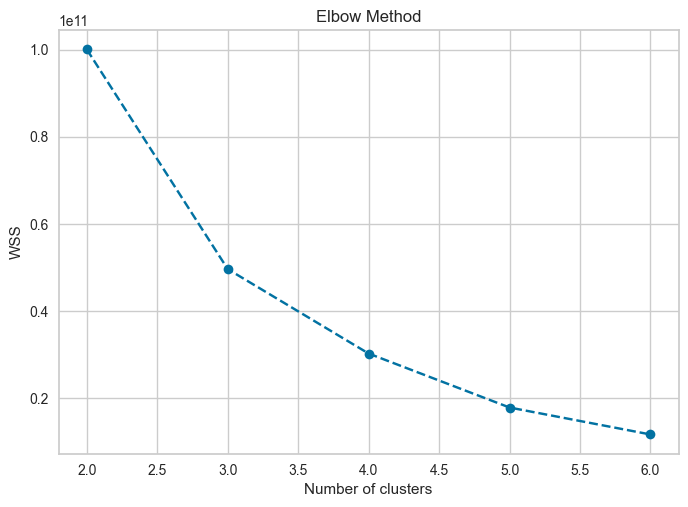

In [64]:
wss = []
for k in clusters:
    # model definition
    Kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model trainin
    Kmeans.fit(X)

    # validation
    wss.append(Kmeans.inertia_)

plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

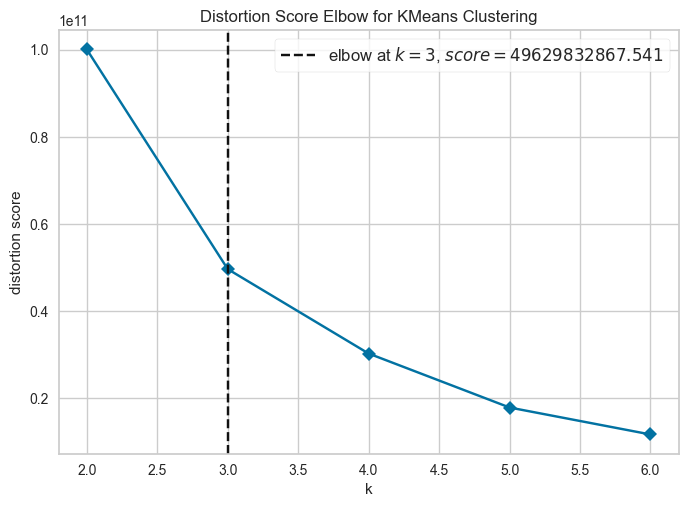

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
kmeans = KElbowVisualizer(Kmeans, k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()


## <span style="color:blue">7.2</span> Silhouette mScore

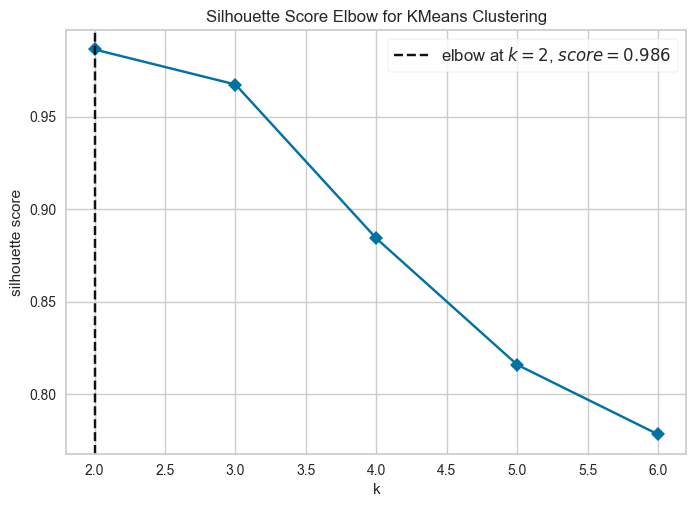

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [66]:
kmeans = KElbowVisualizer(Kmeans, k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

# <font color='blue'> 🚀 8.0 Model Training

## <span style="color:blue">8.1</span>  K-means

In [98]:
# model definition
k=3
model_kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=84)

# model training
model_kmeans.fit(X)

# Clustering
labels = model_kmeans.labels_

# Check unique clusters
print(np.unique(labels))

[0 1 2]


## <span style="color:blue">8.2</span> Cluster Validation

In [99]:
## WSS (Within-cluster sum of squares)
print('WSS value: ', model_kmeans.inertia_)

## Silhouette Score
print('SS value {}:'.format( silhouette_score(X, labels, metric='euclidean') ))

WSS value:  52830442008.00697
SS value 0.9494677566681542:


# <font color='blue'> 🌐 9.0 Cluster Analysis: Unveiling Hidden Patterns

In [108]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,frequency,cluster
0,17850,5288.63,302,35,2
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,2
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


## <span style="color:blue">9.1</span> Visualizaion Inspection

In [101]:
fig = px.scatter_3d(df9, x='gross_revenue', y='recency_days', z='frequency', color='cluster')
fig.show()

## <span style="color:blue">9.2</span> Cluster Profile

In [102]:
df9.head()

,customer_id,gross_revenue,recency_days,frequency,cluster
0,17850,5288.63,302,35,2
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,2
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


In [107]:
# Number os customers
df_cluster = df9[['cluster', 'customer_id']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum() * 100

# Avg Gross Revenue
df_cluster['avg_gross_revenue'] = df9[['cluster', 'gross_revenue']].groupby('cluster').mean().reset_index()['gross_revenue']

# Avg Recency Days
df_cluster['avg_recency_days'] = df9[['cluster', 'recency_days']].groupby('cluster').mean().reset_index()['recency_days']

# Avg Frequency
df_cluster['avg_frequency'] = df9[['cluster', 'frequency']].groupby('cluster').mean().reset_index()['frequency']

df_cluster

,cluster,customer_id,perc_customer,avg_gross_revenue,avg_recency_days,avg_frequency
0,0,6,0.137237,182181.981667,7.166667,89.000000
1,1,31,0.709058,40543.517742,13.290323,53.290323
2,2,4335,99.153705,1372.577826,92.257901,4.614533


### Cluster 01: 

- Number of customers: 6 (0.14% of customers)
- Average recency: 7 days
- Average number of purchases: 89 purchases
- Average revenue: $182,182.00

### Cluster 02:

- Number of customers: 31 (0.71% of customers)
- Average recency: 14 days
- Average number of purchases: 53 purchases
- Average revenue: $40,543.52

### Cluster 03:

- Number of customers: 4.335 (99% of customers)
- Average recency: 92 days
- Average number of purchases: 5 purchases
- Average revenue: $1,372.57

# <font color='blue'> ✨ 10.0 Deploy to Production